# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---

**Student Information:**

- Name: Harshdeep Singh
- Student ID: 218318242
- Email:singhhars@deakin.edu.au
---

# 1.Import Spark

In [172]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession 

# 2.Read and check data

In [0]:
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [175]:
!ls

'bank (1).csv'		     spark-2.4.0-bin-hadoop2.7.tgz
'bank (2).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.1
'bank (3).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.2
'bank (4).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.3
'bank (5).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.4
'bank (6).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.5
 bank.csv		     spark-2.4.0-bin-hadoop2.7.tgz.6
 sample_data		     spark-warehouse
 spark-2.4.0-bin-hadoop2.7


In [176]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 
df.printSchema() 
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

In [177]:
# Checking data distribution of Numerical Variables
 
from pyspark.sql import functions as f

numericFeatures = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numericFeatures).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,11162,41.231947679627304,11.913369192215518,18,95
balance,11162,1528.5385235620856,3225.413325946149,-6847,81204
day,11162,15.658036194230425,8.420739541006462,1,31
duration,11162,371.99381831213043,347.12838571630687,2,3881
campaign,11162,2.508421429851281,2.7220771816614824,1,63
pdays,11162,51.33040673714388,108.75828197197717,-1,854
previous,11162,0.8325568894463358,2.292007218670508,0,58


In [178]:
#checking skewness of each numerical variable

df.select(numericFeatures).agg(f.skewness(numericFeatures[0])).show()
df.select(numericFeatures).agg(f.skewness(numericFeatures[1])).show()
df.select(numericFeatures).agg(f.skewness(numericFeatures[2])).show()
df.select(numericFeatures).agg(f.skewness(numericFeatures[3])).show()
df.select(numericFeatures).agg(f.skewness(numericFeatures[4])).show()
df.select(numericFeatures).agg(f.skewness(numericFeatures[5])).show()
df.select(numericFeatures).agg(f.skewness(numericFeatures[6])).show()

+------------------+
|     skewness(age)|
+------------------+
|0.8626636888266418|
+------------------+

+-----------------+
|skewness(balance)|
+-----------------+
|8.223513810011973|
+-----------------+

+-------------------+
|      skewness(day)|
+-------------------+
|0.11131497345861753|
+-------------------+

+------------------+
|skewness(duration)|
+------------------+
|2.1434064798758596|
+------------------+

+------------------+
|skewness(campaign)|
+------------------+
| 5.544833172113716|
+------------------+

+-----------------+
|  skewness(pdays)|
+-----------------+
|2.449656381764177|
+-----------------+

+------------------+
|skewness(previous)|
+------------------+
| 7.334312390838408|
+------------------+



In [179]:
# Checking data sistribution of categorical variables

df.groupby('job').count().show()
df.groupby('marital').count().show()
df.groupby('education').count().show()
df.groupby('default').count().show()
df.groupby('housing').count().show()
df.groupby('loan').count().show()
df.groupby('contact').count().show()
df.groupby('day').count().show()
df.groupby('month').count().show()
df.groupby('poutcome').count().show()

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 2566|
|      retired|  778|
|      unknown|   70|
|self-employed|  405|
|      student|  360|
|  blue-collar| 1944|
| entrepreneur|  328|
|       admin.| 1334|
|   technician| 1823|
|     services|  923|
|    housemaid|  274|
|   unemployed|  357|
+-------------+-----+

+--------+-----+
| marital|count|
+--------+-----+
|divorced| 1293|
| married| 6351|
|  single| 3518|
+--------+-----+

+---------+-----+
|education|count|
+---------+-----+
|  unknown|  497|
| tertiary| 3689|
|secondary| 5476|
|  primary| 1500|
+---------+-----+

+-------+-----+
|default|count|
+-------+-----+
|     no|10994|
|    yes|  168|
+-------+-----+

+-------+-----+
|housing|count|
+-------+-----+
|     no| 5881|
|    yes| 5281|
+-------+-----+

+----+-----+
|loan|count|
+----+-----+
|  no| 9702|
| yes| 1460|
+----+-----+

+---------+-----+
|  contact|count|
+---------+-----+
|  unknown| 2346|
| cellular| 8042|
|telephone|  774|
+

# 3.Select features

In [180]:

#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2= df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome','deposit')
cols = df2.columns
df2.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|       2|   -1|       0| unknown|    yes|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
only showing top 5 rows



In [181]:
df2.count()  # 11162 rows before filtering

11162

In [0]:

#Remove invalid rows/records using spark.sql 
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

df2.registerTempTable("bank")

df2 = sqlContext.sql("SELECT * FROM bank WHERE job!= 'unknown' AND education!= 'unknown' AND poutcome!= 'unknown'AND poutcome!= 'other' and pdays>=0 ")

In [183]:

df2.count()   #2181 rows after filtering

2181

In [0]:
categoricalColumns = ['job','marital','education','default','housing','loan','poutcome']    # categorical columns in dataframe

In [0]:
#Covert categorical features to metric features using One hot encoding
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [186]:
import pandas as pd
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)
selectedCols = ['label', 'features'] + cols
df2 = df2.select(selectedCols)
df2.printSchema()
pd.DataFrame(df2.take(5), columns=df2.columns)


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



,label,features,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,deposit
0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",33,services,married,secondary,no,3444,yes,no,1,91,4,failure,yes
1,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56,technician,married,secondary,no,589,yes,no,1,147,2,success,yes
2,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",34,admin.,married,tertiary,no,899,yes,no,1,170,3,failure,yes
3,0.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",53,retired,married,tertiary,no,2269,no,no,2,150,1,success,yes
4,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",37,technician,married,secondary,no,5115,yes,no,2,171,4,failure,yes


In [187]:
df2.select('features').show(5)  # each feature row contain sparse vector with 23 features

+--------------------+
|            features|
+--------------------+
|(23,[5,10,12,14,1...|
|(23,[1,10,12,14,1...|
|(23,[2,10,13,14,1...|
|(23,[4,10,13,14,1...|
|(23,[1,10,12,14,1...|
+--------------------+
only showing top 5 rows



## 3.1 normalisation

In [0]:
#Apply Min-Max normalisation on each attribute using MinMaxScaler  
from pyspark.ml.feature import MinMaxScaler 

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

scalerModel = scaler.fit(df2)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(df2)



# 4.Unsupervised learning

## 4.1 K-means

In [189]:
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 


kmeans = KMeans(featuresCol = 'scaledFeatures').setK(2).setSeed(1)   # using 2 clusters
model = kmeans.fit(scaledData)

# Make predictions
predictions = model.transform(scaledData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

######evaluator1 = BinaryClassificationEvaluator(rawPredictionCol='prediction')
######print('Test Area Under ROC', evaluator1.evaluate(predictions))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)
                                           

Silhouette with squared euclidean distance = 0.06039474174824377
Cluster Centers: 
[0.57541899 0.13184358 0.0603352  0.01340782 0.04804469 0.00782123
 0.03575419 0.03575419 0.0603352  0.01675978 0.47486034 0.45027933
 0.         0.97094972 0.99776536 0.62569832 0.92625698 0.48826816
 0.31088587 0.03688247 0.07516506 0.21330303 0.03718187]
[0.0311042  0.18351477 0.19906687 0.20139969 0.11897356 0.11508554
 0.04821151 0.04276827 0.0155521  0.02177294 0.62908243 0.26360809
 0.84836703 0.         0.99611198 0.49533437 0.88569207 0.57465008
 0.36131971 0.02968395 0.07429662 0.25288935 0.03981625]


In [190]:
# As we know the ground truth we can calculate the accuracy of Kmeans using MulticlassificationEvaluator

Prediction = predictions.select("prediction").rdd.map(lambda row: float(row.prediction)).collect()  # reformatting the data type of predictions as double so that accuracy can be calcuate
Labels = predictions.select("label").rdd.map(lambda row: row.label).collect()


pred_kmeans = sqlContext.createDataFrame(zip(Labels,Prediction), schema=['label', 'prediction']) # dataframe with predictions and labels of double data type

evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
print('Accuracy:', evaluator.evaluate(pred_kmeans, {evaluator.metricName: "accuracy"}))



Accuracy: 0.520861989912884


The clustering accuracy is not good. As we know the ground truth we can use supervised learning algotrithms which may show higher accuracy.
The Kmeans accuracy also depends on the number of features (dimentionality). The higher the dimentionality, the less accurate kmeans will  be.
Dimentionality reduction can be performed through PCA (Principal Component Analysis).


## 4.2 PCA

In [191]:
# Applying PCA to two principal components
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")
model = pca.fit(scaledData)

result = model.transform(scaledData).select("pcaFeatures")
result.show(10,truncate=False)

print('variance explained by first 2 principal components is ',sum(model.explainedVariance))

+-----------------------------------------+
|pcaFeatures                              |
+-----------------------------------------+
|[0.9636424850516068,0.3313811478935345]  |
|[0.8373410183626885,0.3880024159205323]  |
|[-0.10845002652578276,0.6564023408615134]|
|[-0.479560942670008,1.1082617061107987]  |
|[0.9576794865061756,0.2714643678687506]  |
|[0.7879027918969023,0.5145147352059565]  |
|[0.5124304692668866,-0.1917648708243116] |
|[-0.7369547765884317,1.0356901001261056] |
|[-0.10282606527163515,0.671822806010155] |
|[1.0661514594145962,0.3285042864447201]  |
+-----------------------------------------+
only showing top 10 rows

variance explained by first 2 principal components is  0.4127855508907272


Only 41 percent of the variance is explained by first two principal components.

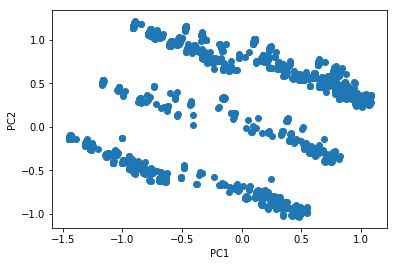

In [192]:
#Generate a scatter plot using the first two PCA components to investigate the data distribution.
import matplotlib.pyplot as plt
import numpy as np

result_list= result.rdd.map(lambda row: [row[0][0], row[0][1]]).collect()

result_array=np.array(result_list)

x,y=zip(*result_array)


plt.scatter(x,y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 5.Supervised learning

In [193]:
#splitting the data into test and training set
train, test = scaledData.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1535
Test Dataset Count: 646


## 5.1 LogisticRegression

In [0]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

lr = LogisticRegression(featuresCol = 'scaledFeatures', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

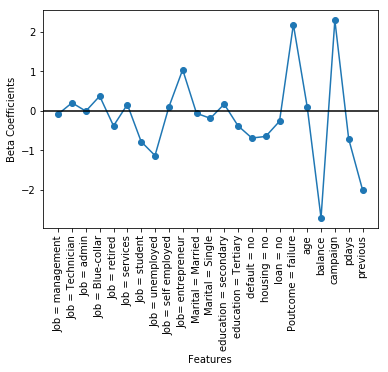

DenseVector([-0.0814, 0.2041, -0.0063, 0.3736, -0.3783, 0.1603, -0.7777, -1.1301, 0.0955, 1.0417, -0.061, -0.1879, 0.1702, -0.3774, -0.6865, -0.6468, -0.262, 2.1844, 0.1051, -2.7069, 2.2922, -0.7105, -1.9948])

In [195]:
#Exam the coefficients
import matplotlib.pyplot as plt
import numpy as np

beta = (lrModel.coefficients)
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
f=['Job = management','Job = Technician','Job = admin','Job = Blue-collar','Job = retired','Job = services',
   'Job = student','Job = unemployed','Job = self employed','Job= entrepreneur','Marital = Married','Marital = Single','education = secondary'
   ,'education = Tertiary','default = no','housing = no','loan = no','Poutcome = failure','age','balance','campaign','pdays','previous']

plt.plot(x,beta,'-o')
plt.xticks(x, f, rotation='vertical')
plt.ylabel('Beta Coefficients')
plt.xlabel('Features')
plt.axhline(0, color='black')

plt.show()

lrModel.coefficients

In [196]:
predictions = lrModel.transform(test)
predictions.show(10)

+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------------------+--------------------+--------------------+----------+
|label|            features|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|      scaledFeatures|       rawPrediction|         probability|prediction|
+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------------------+--------------------+--------------------+----------+
|  0.0|(23,[0,10,12,14,1...| 29|management|married|secondary|     no|    231|     no|  no|       1|   14|       1| failure|    yes|[1.0,0.0,0.0,0.0,...|[0.20581400401594...|[0.55127263878287...|       0.0|
|  0.0|(23,[0,10,12,14,1...| 52|management|married|secondary|     no|    335|     no|  no|       1|  182|       1| failure|    yes|[1.0,0.0,0.0,0.0,...|[0.31464400007368...|[0.

In [197]:
# Evaluating the accuracy of logistic regression
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
print('Accuracy:', evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))



Accuracy: 0.7368421052631579


## 5.2 Decision tree

In [198]:
#Decision tree
from pyspark.ml.classification import DecisionTreeClassifier 

dt = DecisionTreeClassifier(featuresCol = 'scaledFeatures', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.show(10)

+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------------------+-------------+--------------------+----------+
|label|            features|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|      scaledFeatures|rawPrediction|         probability|prediction|
+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------------------+-------------+--------------------+----------+
|  0.0|(23,[0,10,12,14,1...| 29|management|married|secondary|     no|    231|     no|  no|       1|   14|       1| failure|    yes|[1.0,0.0,0.0,0.0,...|[217.0,119.0]|[0.64583333333333...|       0.0|
|  0.0|(23,[0,10,12,14,1...| 52|management|married|secondary|     no|    335|     no|  no|       1|  182|       1| failure|    yes|[1.0,0.0,0.0,0.0,...|[217.0,119.0]|[0.64583333333333...|       0.0|
|  0.

In [199]:
# Evaluating the accuracy of Decision Tree
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
print("Accuracy: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})))



Accuracy: 0.7770897832817337


## 5.3 NaiveBayes

In [200]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

nb = NaiveBayes(smoothing=1,featuresCol = 'scaledFeatures', labelCol = 'label')
model = nb.fit(train)

predictions = model.transform(test)
predictions.show(10)

+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------------------+--------------------+--------------------+----------+
|label|            features|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|      scaledFeatures|       rawPrediction|         probability|prediction|
+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------------------+--------------------+--------------------+----------+
|  0.0|(23,[0,10,12,14,1...| 29|management|married|secondary|     no|    231|     no|  no|       1|   14|       1| failure|    yes|[1.0,0.0,0.0,0.0,...|[-18.099423060967...|[0.71479969025784...|       0.0|
|  0.0|(23,[0,10,12,14,1...| 52|management|married|secondary|     no|    335|     no|  no|       1|  182|       1| failure|    yes|[1.0,0.0,0.0,0.0,...|[-19.734874367002...|[0.

In [201]:
# Evaluating the accuracy of NaiveBayes
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
print("Accuracy:",evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))

Accuracy: 0.7291021671826625
